# **Práctica parte FastAPI**

1. Captura de la pantalla docs con almenos 5 modulos:

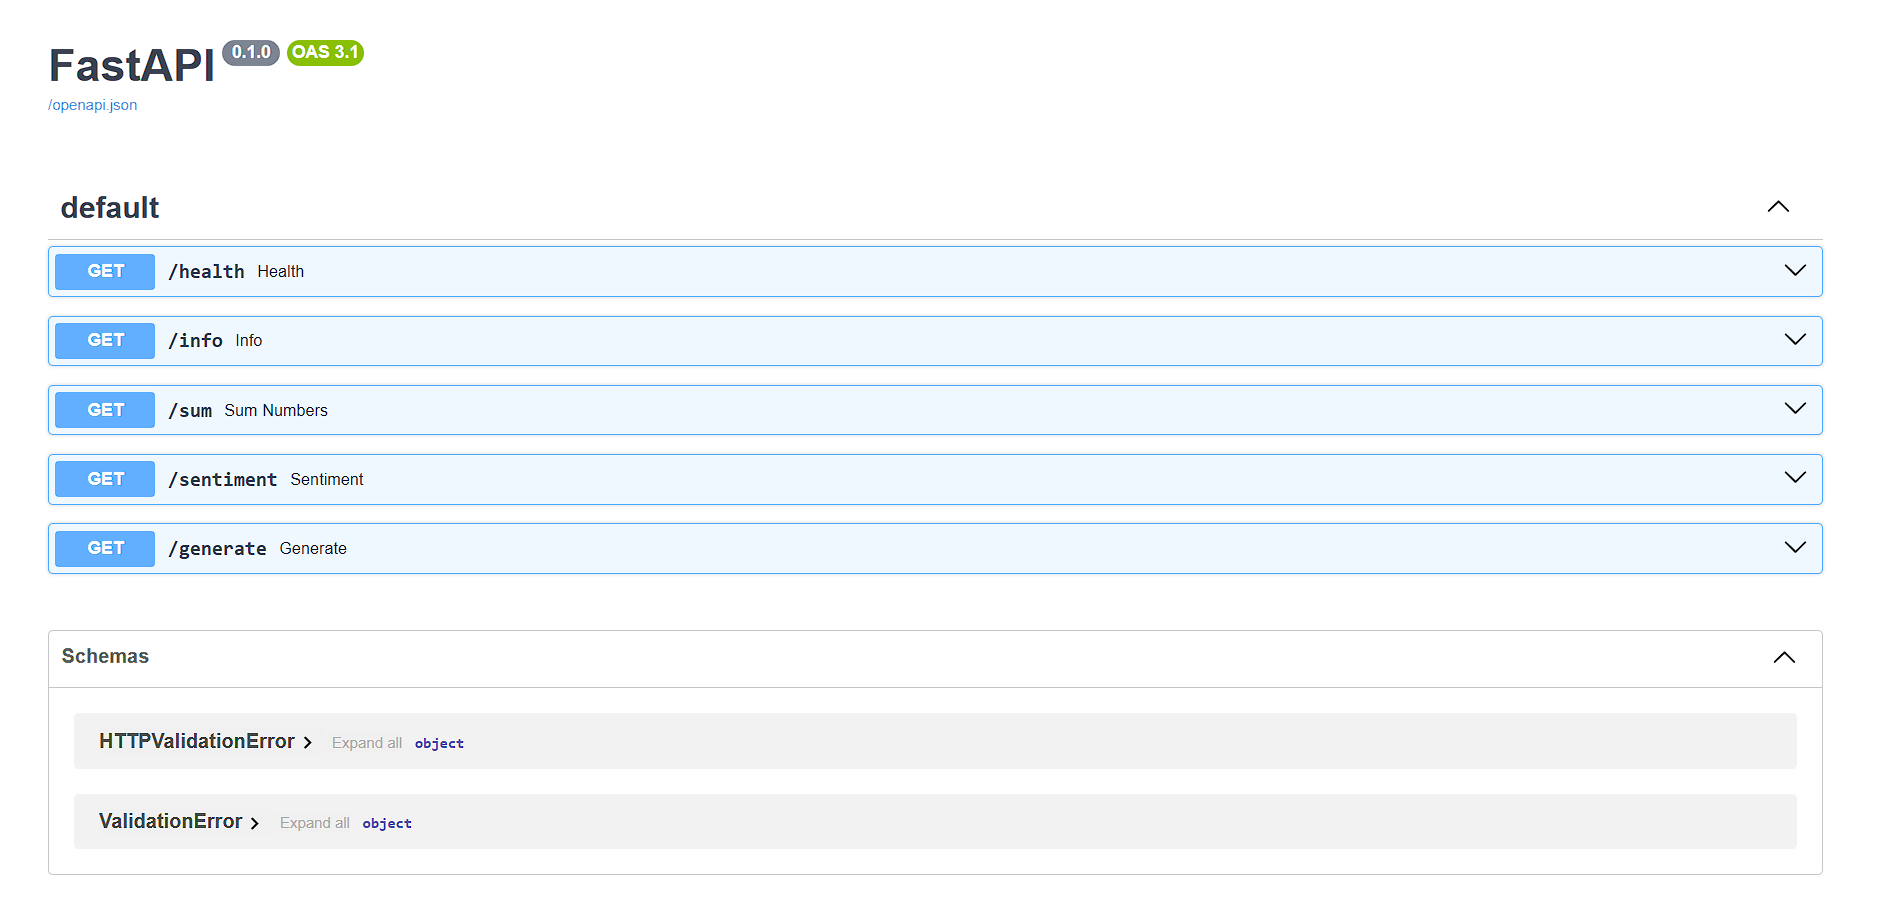

2. Captura de cada una de los modulos con la respuesta dentro docs:

GET/health:

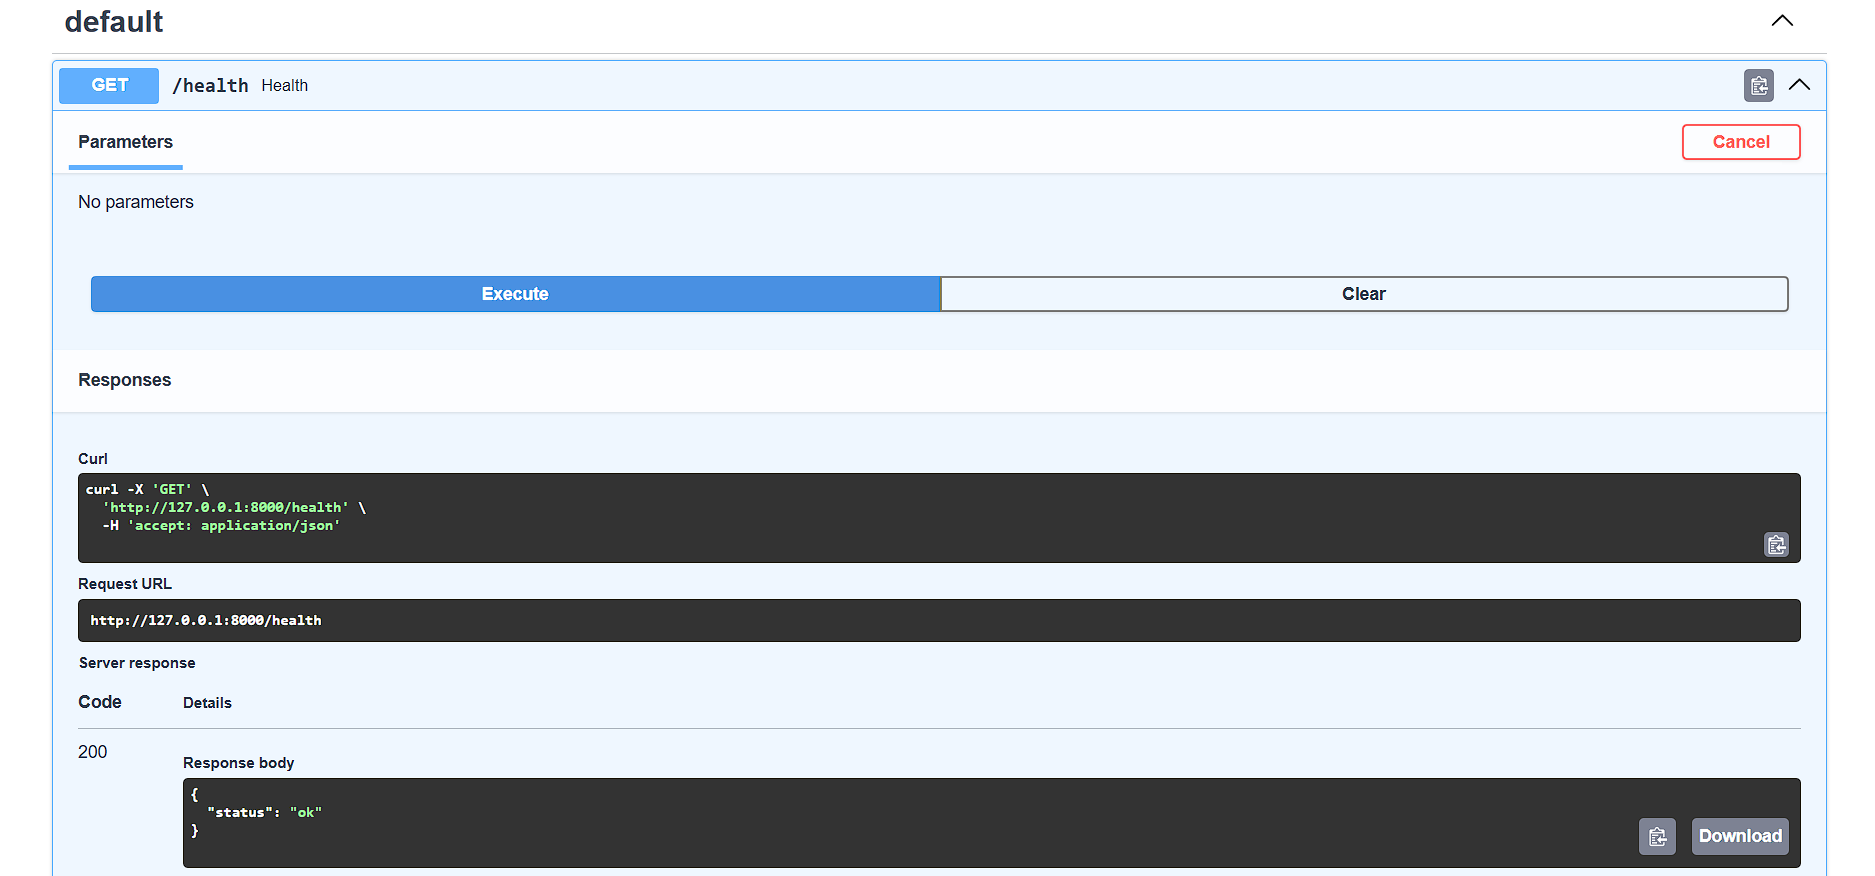

GET/info:

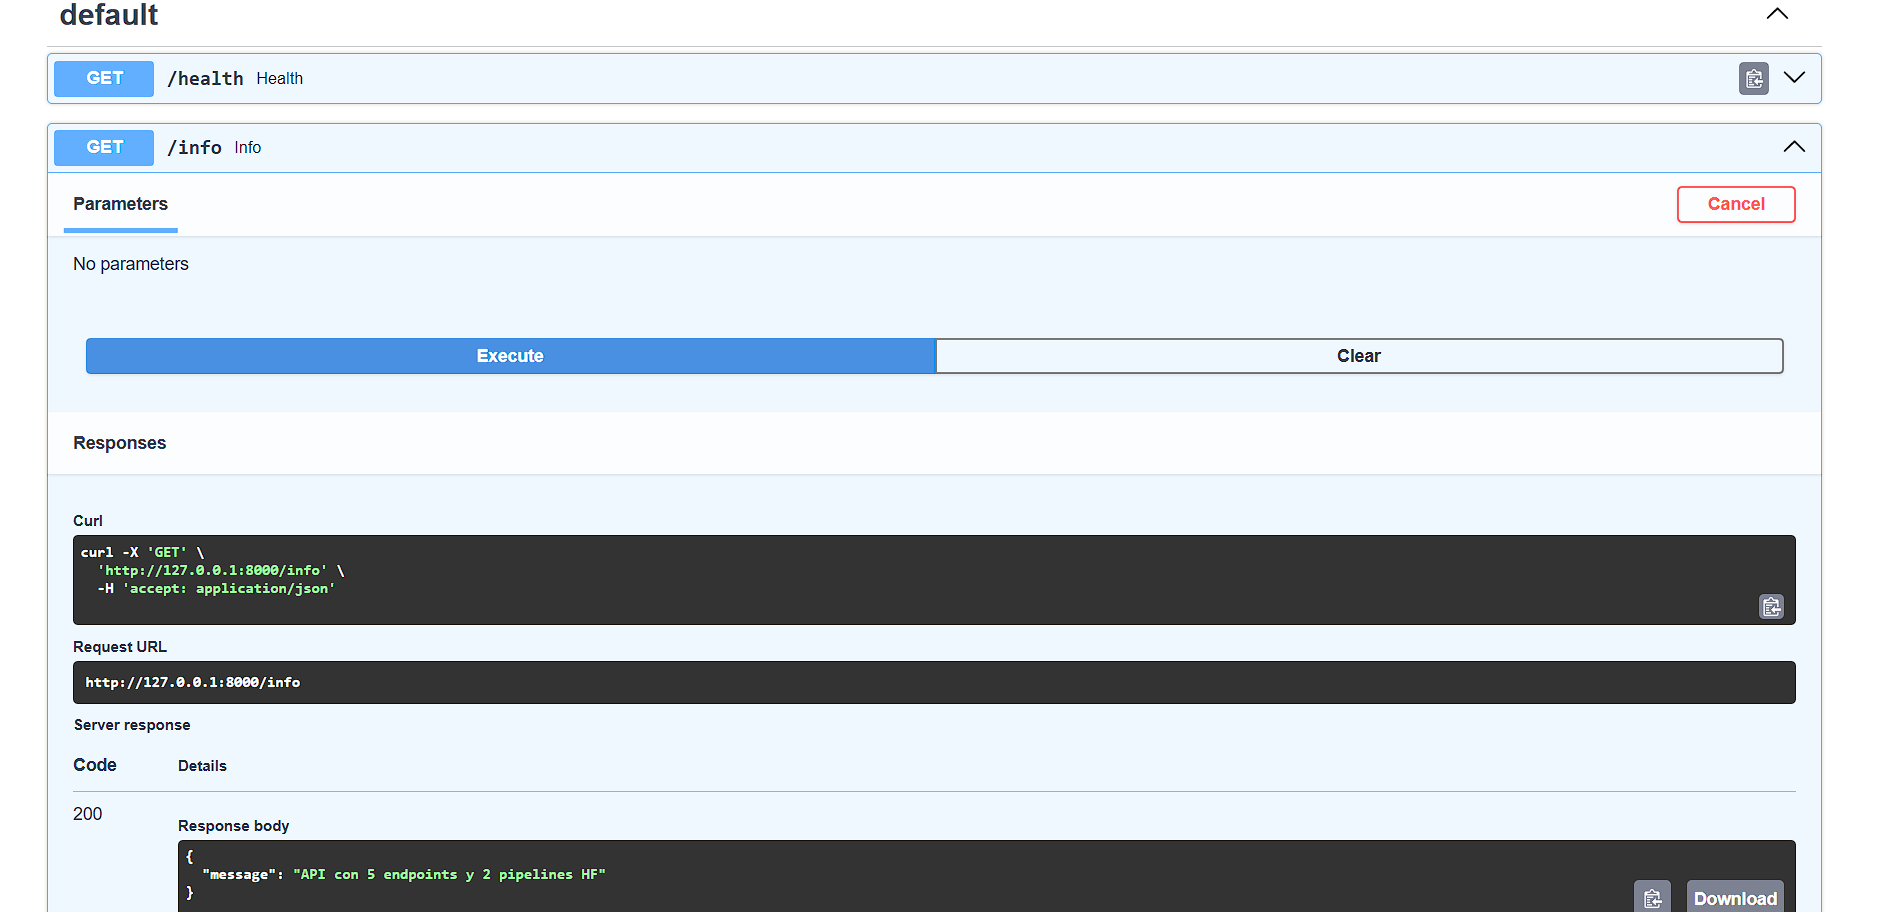

GET/sum:

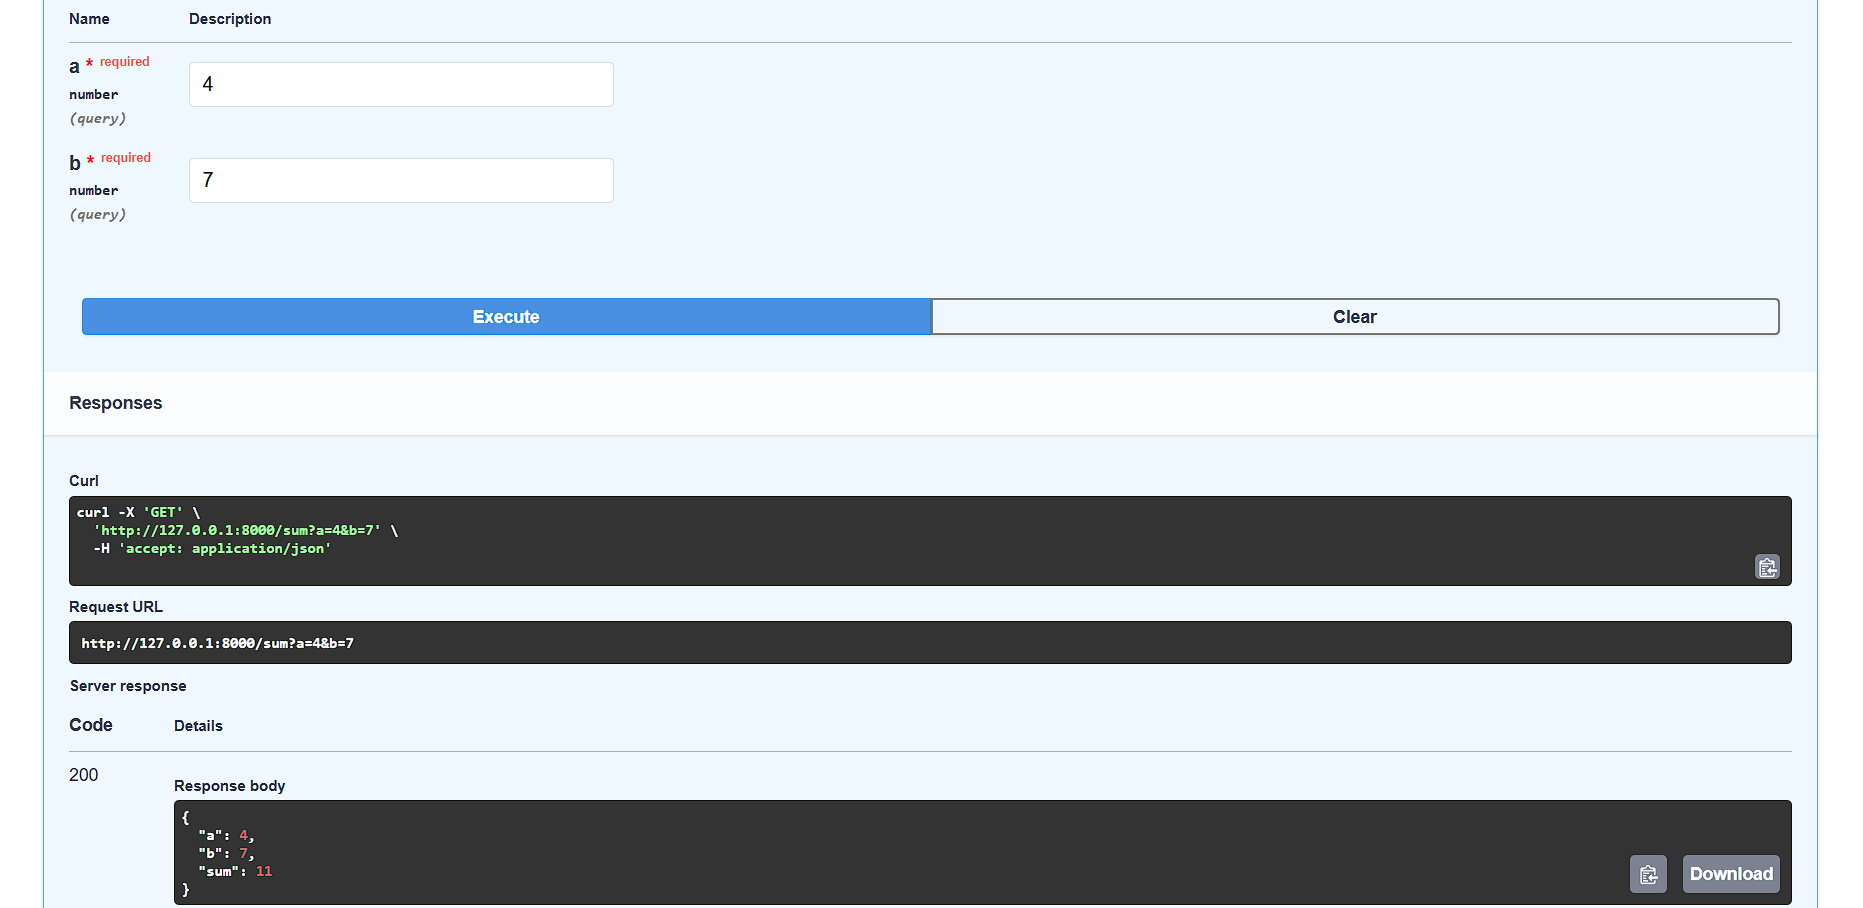

GET/sentiment (Pipeline de Hugging face). Esta pipeline solo funciona bien con el inglés como idioma.

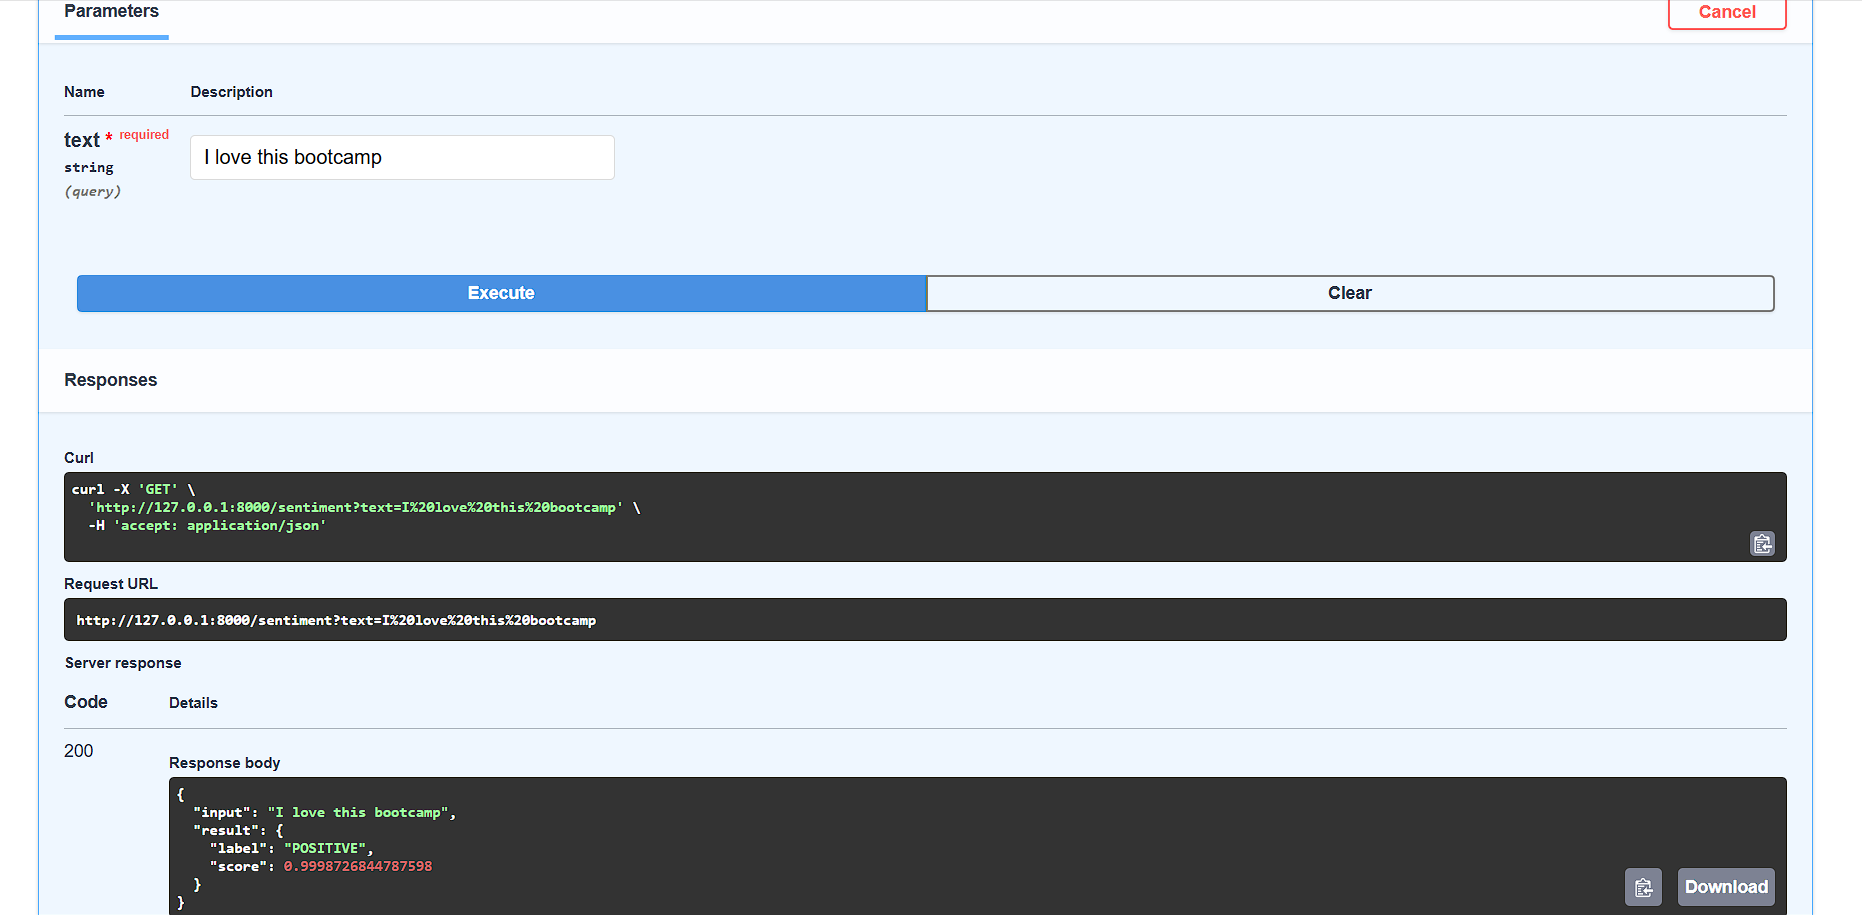

GET/generate (Pipeline de Hugging face). Esta también solo genera algo coherente con el inglés.

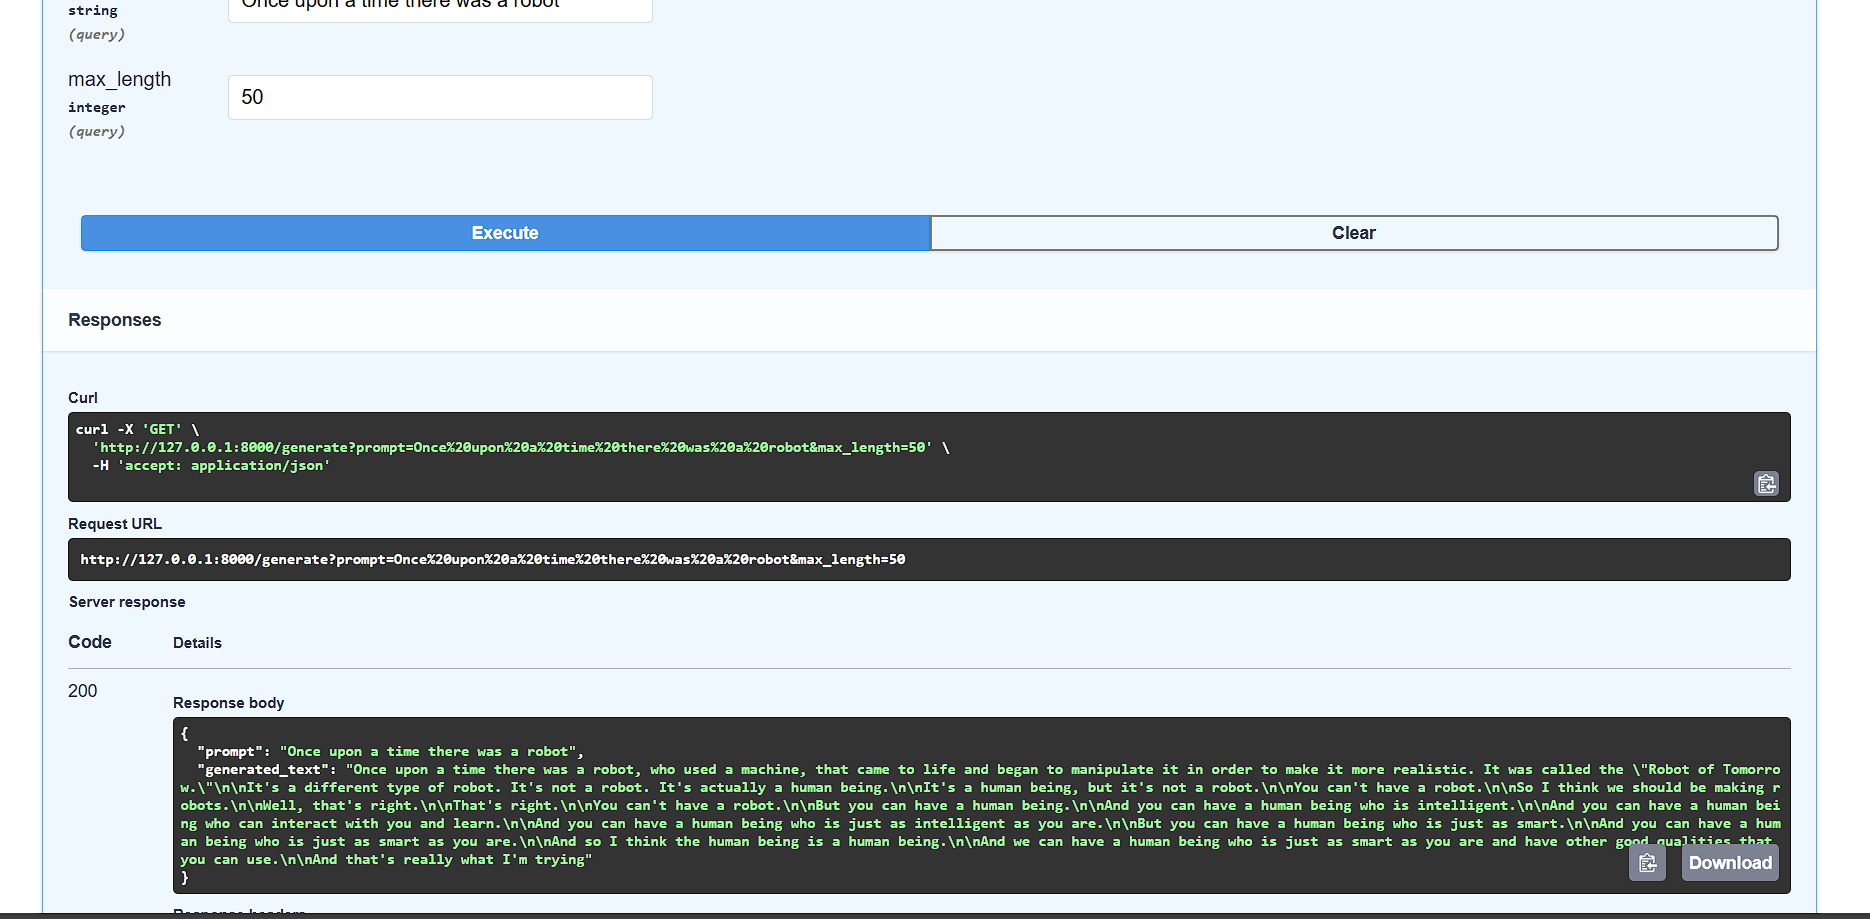

3. Captura de cada uno de los modulos en la llamada https:

GET/health:

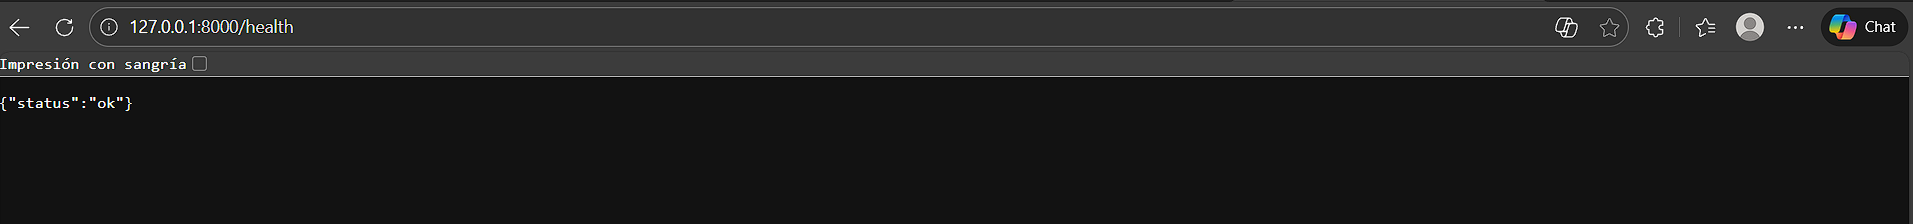

GET/info:

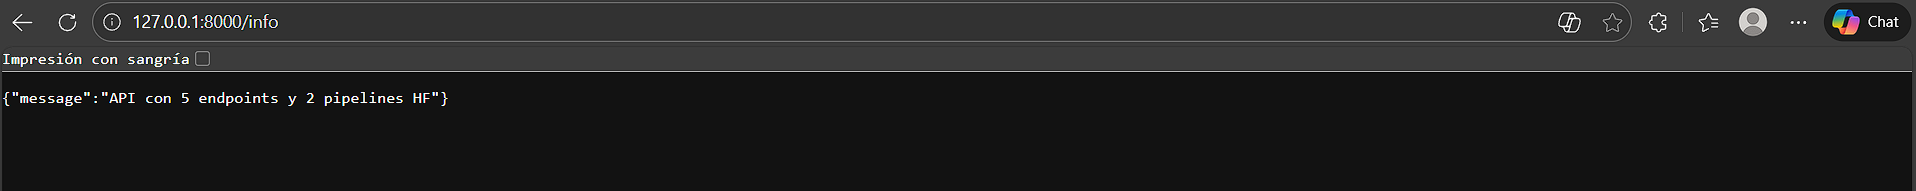

GET/sum:

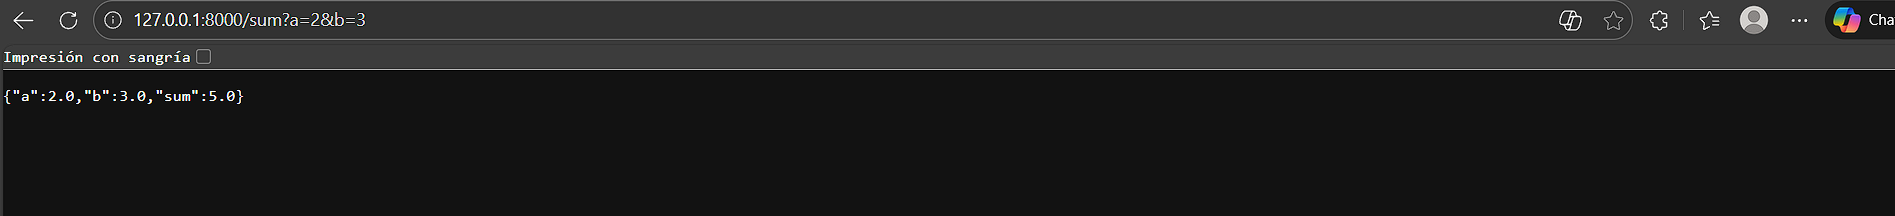

GET/sentiment:

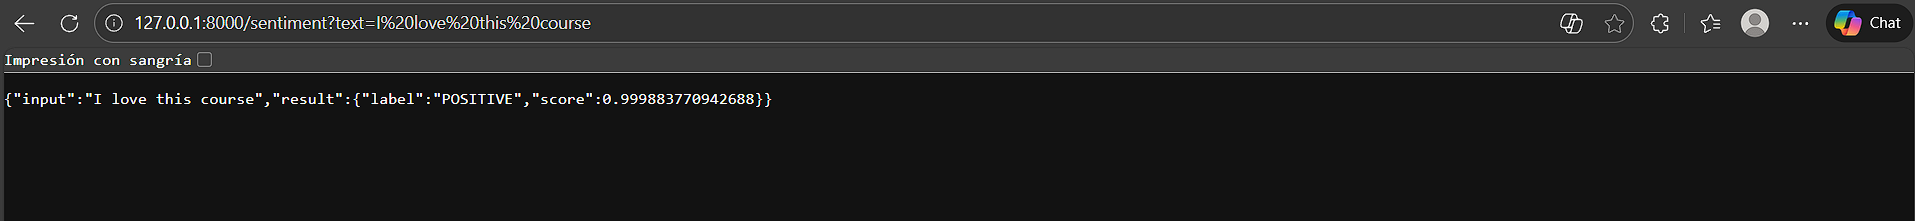

GET/generate:

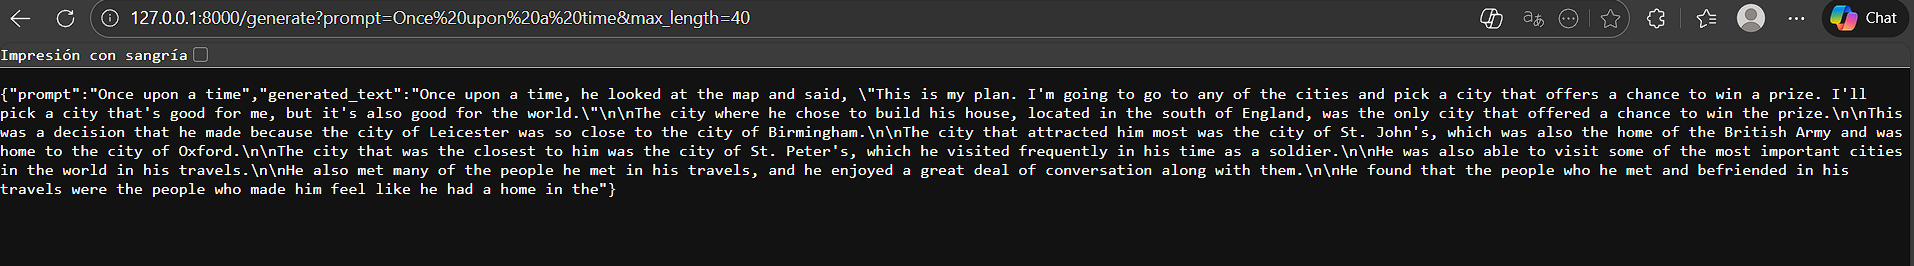